In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt5

In [2]:
import toolsdiadem.tools as dia

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# standard sizes and frequencies for waveguides

AE = 1
c = 3e8
pi = np.pi
# L band
a_L = 16.51e-2
b_L = 8.255e-2
f_L = 1e9
lambda_L = c / f_L
k_L = 2 * np.pi / lambda_L
# C band
a_C = 4.755e-2
b_C = 2.215e-2
# X band
a_X = 2.286e-2
b_X = 1.016e-2
f_X = 9.32e9
lambda_X = c / f_X
k_X = 2 * np.pi / lambda_X
# Ka band 26.5-40 GHz
a_Ka = 7.112e-3
b_Ka = 3.556e-3
f_Ka = 32e9
lambda_Ka = c / f_Ka
k_Ka = 2 * np.pi / lambda_Ka

In [5]:
theta = np.linspace(0, np.pi/2,   50).reshape(1,-1)
phi   = np.linspace(0, 2 * np.pi,100).reshape(-1,1)
u = np.sin(theta) * np.cos(phi)
v = np.sin(theta) * np.sin(phi)

# Open-Ended Rectangular Waveguide

## General formulas (Yaghjian)

Yaghjian, *Approximate Formulas for the Far Field and Gain of Open-Ended Rectangular Waveguide*

When the probe is vertically polarized (large side of the guide along x, small side of the guide along y, z pointing in front of the aperture)

$ \overline{E}(\overline{r}\rightarrow\infty) 
= \frac{e^{jkr}}{kr} \left[ E_E(\theta)\,sin\phi\,\hat{e}_\theta + E_H(\theta)\,cos\phi\,\hat{e}_\phi \right]$

$E_E(\theta)$ and $E_H(\theta)$ formulas are given in the article and implemented in **DIADEM/toolsdiadem/tools** imported as **dia**

In [6]:
# computations for L, X and Ka bands

E_E_L = dia.E_E_yaghjian(theta, k_L, a_L, b_L, AE)
E_H_L = dia.E_H_yaghjian(theta, k_L, a_L, b_L, AE)

E_E_X = dia.E_E_yaghjian(theta, k_X, a_X, b_X, AE)
E_H_X = dia.E_H_yaghjian(theta, k_X, a_X, b_X, AE)

E_E_Ka = dia.E_E_yaghjian(theta, k_Ka, a_Ka, b_Ka, AE)
E_H_Ka = dia.E_H_yaghjian(theta, k_Ka, a_Ka, b_Ka, AE)

E_E = E_E_X
E_H = E_H_X

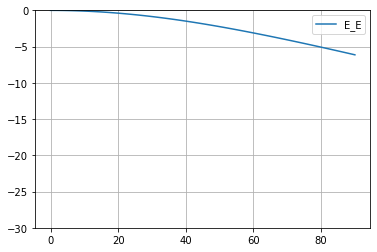

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(theta.flatten() * 180 / np.pi, 20*np.log10(np.abs(E_E_X.flatten())), label='E_E')
ax.set_ylim(-30, 0)
ax.grid()
ax.legend()

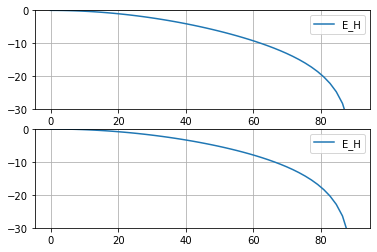

In [8]:
fig, (ax0, ax1) = plt.subplots(2,1)

ax0.plot(theta.flatten() * 180 / np.pi, 20*np.log10(np.abs(E_H_X.flatten())), label='E_H')
ax0.set_ylim(-30, 0)
ax0.grid()
ax0.legend()

ax1.plot(theta.flatten() * 180 / np.pi, 20*np.log10(np.abs(E_H_L.flatten())), label='E_H')
ax1.set_ylim(-30, 0)
ax1.grid()
ax1.legend()

## Far field diagram of the probe

If one calls $E^V(\theta,\phi)$ the field measured by the probe when it is **oriented vertically** (orientation of the probe corresponding to the Yaghjian article as previously discussed), one gets

$ E^V(\theta,\phi) = E_{\theta}^V(\theta,\phi)\,\hat{\theta} + E_{\phi}^V(\theta,\phi)\,\hat{\phi} $

and we can identify the terms of the equation using the Yaghjian formulas

$ E_{\theta}^V(\theta,\phi) = E_E(\theta)\,sin\phi $ 

and 

$ E_{\phi}^V(\theta,\phi) = E_E(\theta)\,cos\phi $

When the probe is **oriented horizontally**, measuring $E^H(\theta,\phi)$, it is **rotated around z** by $-\pi/2$

$ E^H(\theta,\phi) = E_{\theta}^H(\theta,\phi)\,\hat{\theta} + E_{\phi}^H(\theta,\phi)\,\hat{\phi} $

with $\phi'=(\pi/2+\phi)$

$ E_{\theta}^H(\theta,\phi) = E_E(\theta)\,sin\phi' = E_E(\theta)\,cos\phi$ 

and 

$ E_{\phi}^H(\theta,\phi) = E_E(\theta)\,cos\phi' = -E_E(\theta)\,sin\phi $

In [9]:
a = a_X
b = b_X
k = k_X

E_V_probe_theta_phi = dia.E_theta_phi_yaghjian(theta, phi, k, a, b, AE)
E_V_probe = (E_V_probe_theta_phi[0]**2 + E_V_probe_theta_phi[1]**2)**0.5

E_H_probe_theta_phi = dia.E_theta_phi_yaghjian(theta, -pi/2+phi, k, a, b, AE) # rotate the probe by pi/2 around z
E_H_probe = (E_H_probe_theta_phi[0]**2 + E_H_probe_theta_phi[1]**2)**0.5

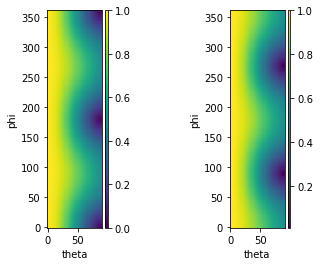

In [10]:
fig, (ax0, ax1) = plt.subplots(1,2)

im = ax0.pcolor(theta * 180 / np.pi, phi * 180 / np.pi, np.abs(E_V_probe), shading='auto')
ax0.grid()
ax0.set_xlabel('theta')
ax0.set_ylabel('phi')
dia.addColorBar(im, ax0)

im = ax1.pcolor(theta * 180 / np.pi, phi * 180 / np.pi, np.abs(E_H_probe), shading='auto')
ax1.grid()
ax1.set_xlabel('theta')
ax1.set_ylabel('phi')
dia.addColorBar(im, ax1)

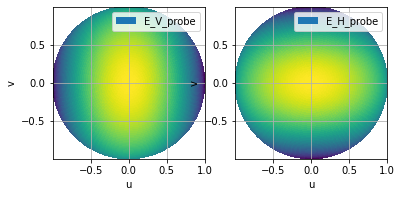

In [11]:
fig, (ax0, ax1) = plt.subplots(1,2)

ax0.pcolor(u, v, np.abs(E_V_probe[:-1,:-1]), label="E_V_probe")
ax0.set_aspect('equal')
ax0.grid()
ax0.set_xlabel('u')
ax0.set_ylabel('v')
ax0.legend()

ax1.pcolor(u, v, np.abs(E_H_probe[:-1,:-1]), label="E_H_probe")
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.legend()

# Probe compensation

## Basic Theory of Probe-Compensated Measurements

References on probe-compensated measurements:

[1] Basic Theory of Probe-Compensated Near-Field Measurements

[2] Applications of Probe-Compensated Near-Field Measurements

Equation (37) in [1] may be erroneous

**one should read**

$ E_{\theta}(\theta, \phi) \, E'_{\theta}(\pi-\theta, \phi) + E_{\phi}(\theta, \phi) \, E'_{\phi}(\pi-\theta,\phi) = \text{(see equation 37 in [1])}$ 

**instead of**

$ E_{\theta}(\theta, \phi) \, E'_{\theta}(\pi-\theta, \phi) - E_{\phi}(r, \phi) \, E'_{\phi}(\pi-\theta,\phi) = \text{(see equation 37 in [1])}$

where E is the unknown far field radiated by the test antenna and E' is the known field radiated by the probe [1]. This last equation is taken as a basis for article [2].

## Applications of Probe-Compensated Near-Field Measurements

For a fixed frequency, an antenna radiates a spherical transverse electromagnetic (TEM) wave in its far field. When this field is normalized with respect to the radial coordinate, we have:

$ E(\theta, \phi) = E_{\theta}(\theta, \phi) \hat{\theta} + E_{\phi}(\theta, \phi) \hat{\phi} $

**One shall have a closer look on the angle conventions used in the article, with $\theta$ and $\phi$ the elevation and azimuth angles (azimuth over elevation with elevation taken from z axis pointing upwards), and renaming $E'$ in $E^V$ and $E^H$ one has using [2]**

$ E_{\theta}^V(\pi-\theta, \phi) \, E_{\theta}(\theta, \phi) + E_{\phi}^V(\pi-\theta,\phi) \, E_{\phi}(\theta, \phi)
= sin\theta \, cos\phi \, I^V(k_y, k_z)$

$ E_{\theta}^H(\pi-\theta, \phi) \, E_{\theta}(\theta, \phi) + E_{\phi}^H(\pi-\theta,\phi) \, E_{\phi}(\theta, \phi)
= sin\theta \, cos\phi \, I^H(k_y, k_z)$

with:

$ I_V(k_y, k_z) = exp(jk_x x_0) \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} 
                    v_V(x_0, y, z) \, exp(jk_y y + jk_z z) \, dx \, dy $
                    
$ I_H(k_y, k_z) = exp(jk_x x_0) \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} 
                    v_H(x_0, y, z) \, exp(jk_y y + jk_z z) \, dx \, dy $

Note: if the phase of the pattern is not of interest, $z_0$ can be taken as zero.

Using the **Cramer's rule** to solve the system of equations, we get

$ E_{\theta}(\theta, \phi)=\frac{sin \theta\,cos \phi}{\Delta (\theta,\phi)} 
[ I_H(\theta, \phi) \, E_{\phi}^V (\pi - \theta, \phi) - I_V(\theta, \phi) \, E_{\phi}^H (\pi - \theta, \phi) ] $

$ E_{\phi}(\theta, \phi)=\frac{sin \theta\,cos \phi}{\Delta (\theta,\phi)} 
[ I_H(\theta, \phi) \, E_{\theta}^V (\pi - \theta, \phi) - I_V(\theta, \phi) \, E_{\theta}^H (\pi - \theta, \phi) ] $

with

$\Delta(\theta,\phi) = E_{\theta}^H(\pi-\theta, \phi) \, E_{\phi}^V(\pi-\theta,\phi)
                      -E_{\theta}^V(\pi-\theta, \phi) \, E_{\phi}^H(\pi-\theta,\phi)$

**Cramer's rule:**

$
\left\{ \begin{aligned} a\,x + b\,y & = e\\ c\,x + d\,y & = f\\ \end{aligned} \right. \quad\quad
x = \frac{\begin{vmatrix} e & b \\ f & d \end{vmatrix}}{\Delta} \quad\quad
y = \frac{\begin{vmatrix} a & e \\ c & f \end{vmatrix}}{\Delta} \quad\quad
\Delta = \begin{vmatrix} a & b \\ c & d \end{vmatrix} $

**With other angle conventions, i.e. $\theta$ and $\phi$ the polar spherical angles as described in Stuart/McCormic/Parini p.157, one gets**

$ E_{\theta}^V(\theta, -\phi) \, E_{\theta}(\theta, \phi) + E_{\phi}^V(\theta,-\phi) \, E_{\phi}(\theta, \phi)
= cos\theta \, I_V(k_y, k_z)$

$ E_{\theta}^H(\theta, -\phi) \, E_{\theta}(\theta, \phi) + E_{\phi}^H(\theta,-\phi) \, E_{\phi}(\theta, \phi)
= cos\theta \, I_H(k_y, k_z)$                    

The solution of this system of equations is

$ E_{\theta}(\theta, \phi)=\frac{cos\theta}{\Delta (\theta,\phi)} 
[ I_H(\theta, \phi) \, E_{\phi}^V (\theta, -\phi) - I_V(\theta, \phi) \, E_{\phi}^H (\theta, -\phi) ] $

$ E_{\phi}(\theta, \phi)=\frac{cos\theta}{\Delta (\theta,\phi)} 
[ I_H(\theta, \phi) \, E_{\theta}^V (\theta, -\phi) - I_V(\theta, \phi) \, E_{\theta}^H (\theta, -\phi) ] $

with

$\Delta(\theta,\phi) = E_{\theta}^H(\theta,-\phi) \, E_{\phi}^V(\theta,-\phi)
                      -E_{\theta}^V(\theta,-\phi) \, E_{\phi}^H(\theta,-\phi)$

In [12]:
Delta_theta_phi = E_H_probe_theta_phi[0]*E_V_probe_theta_phi[1]-E_V_probe_theta_phi[0]*E_H_probe_theta_phi[1]

Text(0, 0.5, 'v')

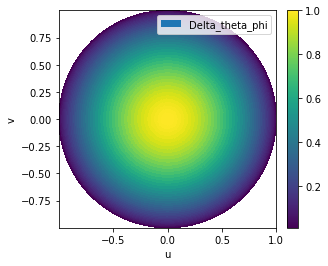

In [13]:
fig, ax = plt.subplots(1,1)

im = ax.pcolor(u, v, np.abs(Delta_theta_phi[:-1,:-1]), label="Delta_theta_phi")
dia.addColorBar(im, ax)
ax.set_aspect('equal')
ax.legend()
ax.grid()
ax.set_xlabel('u')
ax.set_ylabel('v')

In [14]:
v.shape

(100, 50)

# Probe diagram 

Yaghjian, *Approximate Formulas for the Far Field and Gain of Open-Ended Rectangular Waveguide*

$ \overline{E}(\overline{r}\rightarrow\infty) 
= \frac{e^{jkr}}{kr} \left[ E_E(\theta)\,\sin\phi\,\hat{e}_\theta + E_H(\theta)\,\cos\phi\,\hat{e}_\phi \right]
$

$
\left\{\begin{aligned}
E_\theta = E_E(\theta)\sin\phi \\
E_\phi = E_H(\theta)\cos\phi
\end{aligned}\right.
$

$ \hat{\theta} = \cos\theta\cos\phi\,\hat{x} + \cos\theta\sin\phi\,\hat{y} - \sin\theta\,\hat{z}\\
  \hat{\phi}  = -\sin\phi\,\hat{x} + \cos\phi\,\hat{y} $

Ludwig I

$ \left\{\begin{matrix}
E_x &=& E_\theta\cos\theta\,\cos\phi - E_\phi\sin\phi \\
E_y &=& E_\theta\cos\theta\,\sin\phi + E_\phi\cos\phi \\
E_z &=& -E_\theta\sin\theta
\end{matrix}\right. $

In [15]:
a = a_X
b = b_X
k = k_X

E_V_probe_theta, E_V_probe_phi = dia.E_theta_phi_yaghjian(theta, phi, k, a, b, AE)

E_V_probe_x = E_V_probe_theta * np.cos(theta) * np.cos(phi) - E_V_probe_phi * np.sin(phi)
E_V_probe_y = E_V_probe_theta * np.cos(theta) * np.sin(phi) + E_V_probe_phi * np.cos(phi)
E_V_probe_z = -E_V_probe_theta * np.sin(theta)

# rotate the probe by pi/2 around z
E_H_probe_theta, E_H_probe_phi = dia.E_theta_phi_yaghjian(theta, -pi/2+phi, k, a, b, AE)

E_H_probe_x = E_H_probe_theta * np.cos(theta) * np.cos(phi) - E_H_probe_phi * np.sin(phi)
E_H_probe_y = E_H_probe_theta * np.cos(theta) * np.sin(phi) + E_H_probe_phi * np.cos(phi)
E_H_probe_z = -E_H_probe_theta * np.sin(theta)

Text(0.5, 0.98, 'Ludwig I')

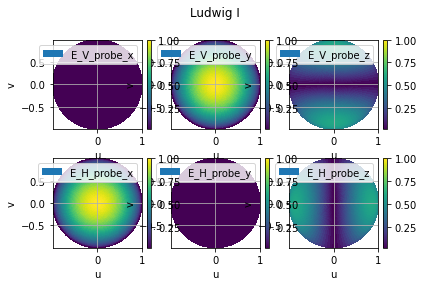

In [16]:
fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3)

im0 = ax0.pcolor(u, v, np.abs(E_V_probe_x[:-1,:-1]), label="E_V_probe_x")
ax0.set_xlabel('u')
ax0.set_ylabel('v')
ax0.legend()
dia.addColorBar(im0, ax0)

im1 = ax1.pcolor(u, v, np.abs(E_V_probe_y[:-1,:-1]), label="E_V_probe_y")
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.legend()
dia.addColorBar(im1, ax1)

im2 = ax2.pcolor(u, v, np.abs(E_V_probe_z[:-1,:-1]), label="E_V_probe_z")
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.legend()
dia.addColorBar(im2, ax2)

lim = im1.get_clim()
im0.set_clim(lim)
im2.set_clim(lim)

im3 = ax3.pcolor(u, v, np.abs(E_H_probe_x[:-1,:-1]), label="E_H_probe_x")
ax3.set_xlabel('u')
ax3.set_ylabel('v')
ax3.legend()
dia.addColorBar(im3, ax3)

im4 = ax4.pcolor(u, v, np.abs(E_H_probe_y[:-1,:-1]), label="E_H_probe_y")
ax4.set_xlabel('u')
ax4.set_ylabel('v')
ax4.legend()
dia.addColorBar(im4, ax4)

im5 = ax5.pcolor(u, v, np.abs(E_H_probe_z[:-1,:-1]), label="E_H_probe_z")
ax5.set_xlabel('u')
ax5.set_ylabel('v')
ax5.legend()
dia.addColorBar(im5, ax5)

lim = im3.get_clim()
im4.set_clim(lim)
im5.set_clim(lim)

fig.suptitle("Ludwig I")

Ludwig III

$ 
\left\{\begin{matrix}
\hat{\underline{e}}_{co}    &=& \cos\phi\,\hat{\underline{e}}_\theta - \sin\phi\,\hat{\underline{e}}_\phi\\
\hat{\underline{e}}_{cross} &=& \sin\phi\,\hat{\underline{e}}_\theta + \cos\phi\,\hat{\underline{e}}_\phi
\end{matrix}\right.
$

In [17]:
E_V_co    = E_V_probe_theta * np.cos(phi) - E_V_probe_phi * np.sin(phi)
E_V_cross = E_V_probe_theta * np.sin(phi) + E_V_probe_phi * np.cos(phi)

E_H_co    = E_H_probe_theta * np.cos(phi) - E_H_probe_phi * np.sin(phi)
E_H_cross = E_H_probe_theta * np.sin(phi) + E_H_probe_phi * np.cos(phi)

Text(0.5, 0.98, 'Ludwig III')

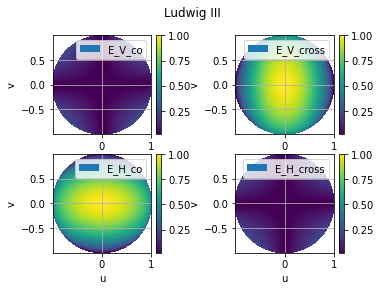

In [18]:
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2)

im0 = ax0.pcolor(u, v, np.abs(E_V_co[:-1,:-1]), label="E_V_co")
ax0.set_xlabel('u')
ax0.set_ylabel('v')
ax0.legend()
dia.addColorBar(im0, ax0)

im1 = ax1.pcolor(u, v, np.abs(E_V_cross[:-1,:-1]), label="E_V_cross")
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.legend()
dia.addColorBar(im1, ax1)

im2 = ax2.pcolor(u, v, np.abs(E_H_co[:-1,:-1]), label="E_H_co")
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.legend()
dia.addColorBar(im2, ax2)

im3 = ax3.pcolor(u, v, np.abs(E_H_cross[:-1,:-1]), label="E_H_cross")
ax3.set_xlabel('u')
ax3.set_ylabel('v')
ax3.legend()
dia.addColorBar(im3, ax3)

lim = im1.get_clim()
im0.set_clim(lim)
im2.set_clim(lim)
im3.set_clim(lim)

fig.suptitle("Ludwig III")